In [1]:
#Importamos las librerias necesarias para desarrollar el proyecto
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from sklearn import linear_model
import datetime
import os
import plotly.graph_objs as go

In [2]:
#Importamos el dataset que analizaremos en este ejercicio
eth = pd.read_csv('ETH-USD.csv')
eth.head(12)

Date        Open        High         Low       Close   Adj Close  \
0   2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1   2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2   2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3   2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4   2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
5   2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   
6   2017-11-15  337.963989  340.911987  329.812988  333.356995  333.356995   
7   2017-11-16  333.442993  336.158997  323.605988  330.924011  330.924011   
8   2017-11-17  330.166992  334.963989  327.523010  332.394012  332.394012   
9   2017-11-18  331.980011  349.615997  327.687012  347.612000  347.612000   
10  2017-11-19  347.401001  371.290985  344.739990  354.385986  354.385986   
11  2017-11-20  354.093994  372.136993  353.289001  366.730011  366.730011   

        Volume  
0    893249984  
1    885985984  
2    842300992  
3   1613479936  
4   1041889984  
5   1069680000  
6    722665984  
7    797254016  
8    621732992  
9    649638976  
10  1181529984  
11   807027008

In [3]:
#Miramos el número de lineas del dataset.
len(eth)

1598

In [4]:
#Vemos toda la info del dataset, vemos que en todas las filas coincide el numero de non-null. Coincide con el mismo len que el del dataset
#No hay, por tanto, valores nulos en todo el dataset
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


In [5]:
eth.isnull().sum() 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
#Vemos que la columna de Date está en formato object, procedemos a hacer la transformación
eth['Date'] = eth['Date'].astype('datetime64[ns]')

In [7]:
#Comprobamos
print(eth.loc[1,'Date'])
eth.head()

2017-11-10 00:00:00


Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984

In [8]:
eth['Date'].value_counts()

2017-11-09    1
2020-10-17    1
2020-10-15    1
2020-10-14    1
2020-10-13    1
             ..
2019-04-23    1
2019-04-22    1
2019-04-21    1
2019-04-20    1
2022-03-25    1
Name: Date, Length: 1598, dtype: int64

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import plotly.graph_objs as go

In [10]:
trace1 = go.Scatter(
    x=eth['Date'],
    y=eth['Open'].astype(float),
    mode='lines',
    name='Open Price')

buttons_1m=dict(count=1,label='1m',step='month',stepmode='backward')
buttons_6m=dict(count=6,label='6m',step='month',stepmode='backward')
buttons_1y=dict(count=12,label='1y',step='month',stepmode='backward')
buttons_3y=dict(count=36,label='3y',step='month',stepmode='backward')
buttons_all=dict(step='all')
buttons=list([buttons_1m,buttons_6m,buttons_1y,buttons_3y,buttons_all])

layout=dict(title='Ethereum Prices',
            xaxis=dict(rangeselector=dict(buttons=buttons),
                       rangeslider=dict(visible=True),type='date'))
data_2_plot = list([trace1])
fig = dict(data=data_2_plot, layout=layout)
import plotly.io as pio
pio.show(fig)

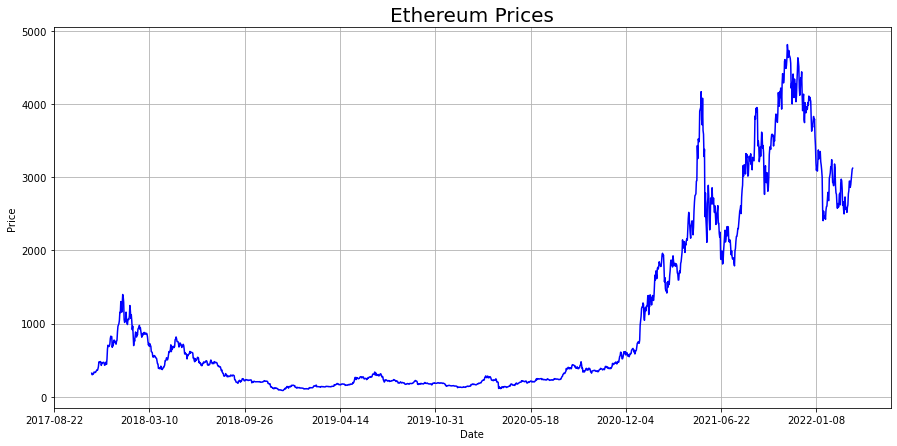

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(eth['Date'], eth['Close'], color='Blue')
# Define the date format
date_form = DateFormatter('%Y')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.title('Ethereum Prices', fontsize='20')
plt.grid()
plt.show()

In [12]:
#Precio máximo alcanzado
eth.iloc[eth['Close'].argmax()]

Date         2021-11-08 00:00:00
Open                 4619.649414
High                 4822.363281
Low                  4619.649414
Close                4812.087402
Adj Close            4812.087402
Volume               19290896267
Name: 1460, dtype: object

In [13]:
trace2 = go.Scatter(
    x=eth['Date'],
    y=eth['Volume'].astype(float),
    mode='lines',
    name='Volume')

buttons_1m=dict(count=1,label='1m',step='month',stepmode='backward')
buttons_6m=dict(count=6,label='6m',step='month',stepmode='backward')
buttons_1y=dict(count=12,label='1y',step='month',stepmode='backward')
buttons_3y=dict(count=36,label='3y',step='month',stepmode='backward')
buttons_all=dict(step='all')
buttons=list([buttons_1m,buttons_6m,buttons_1y,buttons_3y,buttons_all])

layout=dict(title='Ethereum Volume (2017-2022)',
            xaxis=dict(rangeselector=dict(buttons=buttons),
                       rangeslider=dict(visible=True),type='date'))
data_3_plot = list([trace2])
fig = dict(data=data_3_plot, layout=layout)
import plotly.io as pio
pio.templates["green"] = go.layout.Template(
    layout=go.Layout(
        colorway=['#8fce00']
    )
)
pio.templates.default = 'green'
pio.show(fig)

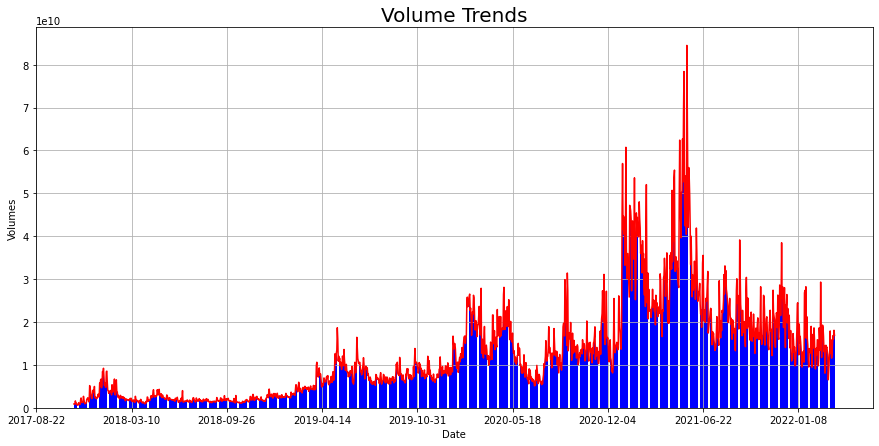

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(pd.to_datetime(eth['Date']), eth['Volume'], color='Blue')
ax.plot(pd.to_datetime(eth['Date']), eth['Volume'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Volumes')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()

In [15]:
eth['Market Cap'] = eth['Open'] * eth['Volume']

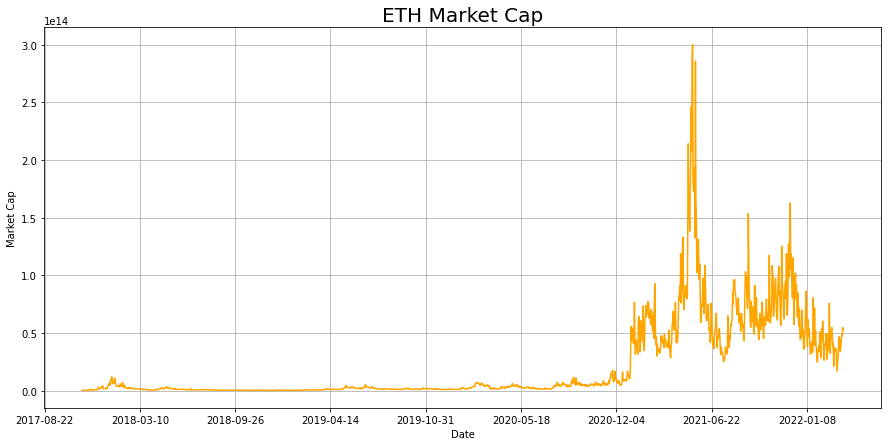

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(eth['Date'], eth['Market Cap'], color='Orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Market Cap')
plt.title('ETH Market Cap', fontsize='20')
plt.grid()
plt.show()

In [17]:
trace3 = go.Scatter(
    x=eth['Date'],
    y=eth['Market Cap'].astype(float),
    mode='lines',
    name='Market Cap')

buttons_1m=dict(count=1,label='1m',step='month',stepmode='backward')
buttons_6m=dict(count=6,label='6m',step='month',stepmode='backward')
buttons_1y=dict(count=12,label='1y',step='month',stepmode='backward')
buttons_3y=dict(count=36,label='3y',step='month',stepmode='backward')
buttons_all=dict(step='all')
buttons=list([buttons_1m,buttons_6m,buttons_1y,buttons_3y,buttons_all])

layout=dict(title='Ethereum Market Cap',
            xaxis=dict(rangeselector=dict(buttons=buttons),
                       rangeslider=dict(visible=True),type='date'))
data_plot3 = list([trace3])
fig = dict(data=data_plot3, layout=layout)
import plotly.io as pio
pio.templates["orange"] = go.layout.Template(
    layout=go.Layout(
        colorway=['#ffa500 ']
    )
)
pio.templates.default = 'orange'
pio.show(fig)

In [18]:
#Market Cap máximo alcanzado
eth.iloc[eth['Market Cap'].argmax()]

Date          2021-05-13 00:00:00
Open                  3828.918457
High                  4032.563477
Low                   3549.407227
Close                 3715.148438
Adj Close             3715.148438
Volume                78398214539
Market Cap    300180370644222.875
Name: 1281, dtype: object

In [19]:
eth['vol'] = (eth['Close'] / eth['Close'].shift(1))

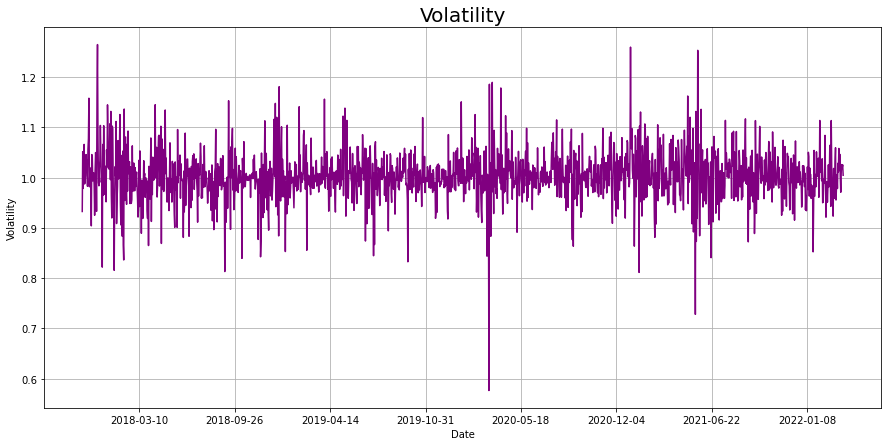

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(eth['Date'], eth['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
plt.title('Volatility', fontsize='20')
plt.grid()
plt.show()

In [21]:
trace6 = go.Scatter(
    x=eth['Date'],
    y=eth['vol'].astype(float),
    mode='lines',
    name='volatility')

buttons_1m=dict(count=1,label='1m',step='month',stepmode='backward')
buttons_6m=dict(count=6,label='6m',step='month',stepmode='backward')
buttons_1y=dict(count=12,label='1y',step='month',stepmode='backward')
buttons_3y=dict(count=36,label='3y',step='month',stepmode='backward')
buttons_all=dict(step='all')
buttons=list([buttons_1m,buttons_6m,buttons_1y,buttons_3y,buttons_all])

layout=dict(title='Ethereum Volatility',
            xaxis=dict(rangeselector=dict(buttons=buttons),
                       rangeslider=dict(visible=True),type='date'))
data_5_plot = list([trace6])
fig = dict(data=data_5_plot, layout=layout)
import plotly.io as pio
pio.templates["purple"] = go.layout.Template(
    layout=go.Layout(
        colorway=['#800080  ']
    )
)
pio.templates.default = 'purple'
pio.show(fig)

<AxesSubplot:>

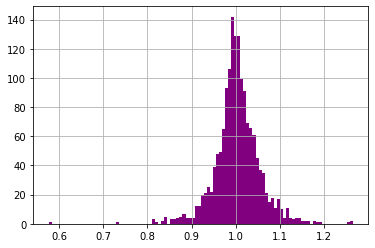

In [22]:
eth['vol'].hist(bins=100, color='purple')

In [23]:
eth['Cumulative Return'] = (eth['vol']).cumprod()

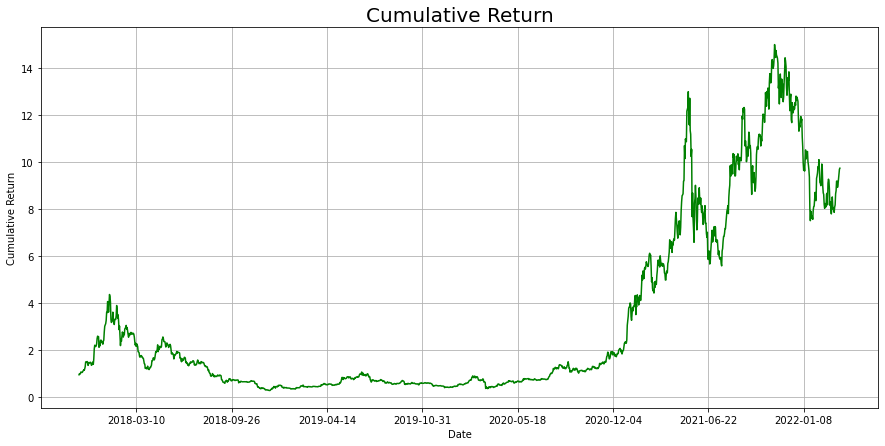

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(eth['Date'], eth['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
plt.title('Cumulative Return', fontsize='20')
plt.grid()
plt.show()

In [25]:
eth['Cumulative Return'] = (eth['vol']).cumprod()
trace7 = go.Scatter(
    x=eth['Date'],
    y=eth['Cumulative Return'].astype(float),
    mode='lines',
    name='Cumulative Return')

buttons_1m=dict(count=1,label='1m',step='month',stepmode='backward')
buttons_6m=dict(count=6,label='6m',step='month',stepmode='backward')
buttons_1y=dict(count=12,label='1y',step='month',stepmode='backward')
buttons_3y=dict(count=36,label='3y',step='month',stepmode='backward')
buttons_all=dict(step='all')
buttons=list([buttons_1m,buttons_6m,buttons_1y,buttons_3y,buttons_all])

layout=dict(title='Ethereum Cumulative Return',
            xaxis=dict(rangeselector=dict(buttons=buttons),
                       rangeslider=dict(visible=True),type='date'))
data_6_plot = list([trace7])
fig = dict(data=data_6_plot, layout=layout)
import plotly.io as pio
pio.templates["yellow"] = go.layout.Template(
    layout=go.Layout(
        colorway=['#ffd966']
    )
)
pio.templates.default = 'yellow'
pio.show(fig)

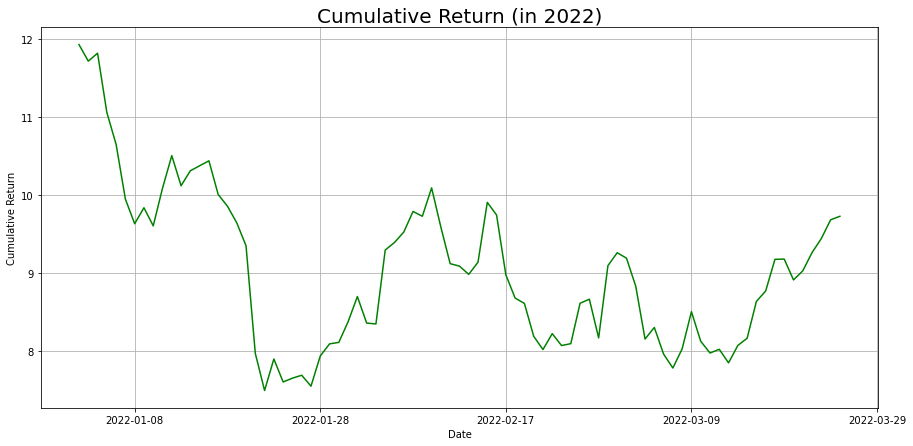

In [26]:
year_2022_eth = eth[(eth['Date'] > '2022-01')]
year_2022_eth = year_2022_eth.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
year_2022_eth['Date'] = pd.to_datetime(year_2022_eth['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(year_2022_eth['Date'], year_2022_eth['Cumulative Return'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
plt.grid()
plt.title('Cumulative Return (in 2022)', fontsize='20')
plt.show()

In [27]:
eth["returns"] = (eth["Close"]/eth["Close"].shift(1)) - 1

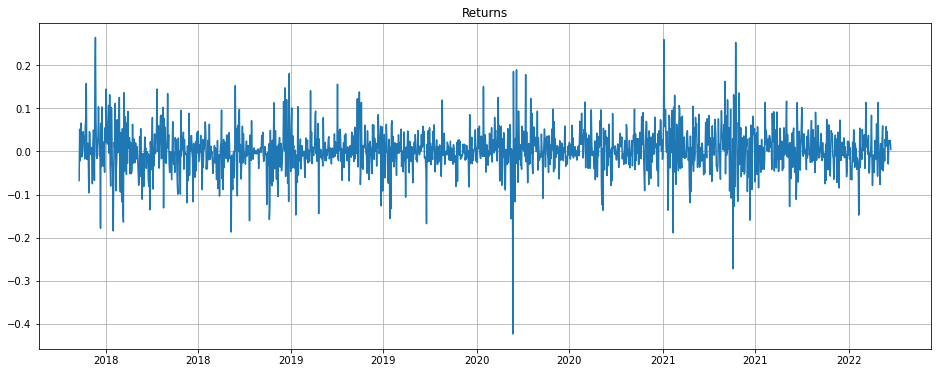

In [28]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(eth.Date, eth['returns'])
ax.xaxis.set_major_formatter(date_form)
plt.title('Returns')
plt.grid()
plt.show()

<AxesSubplot:>

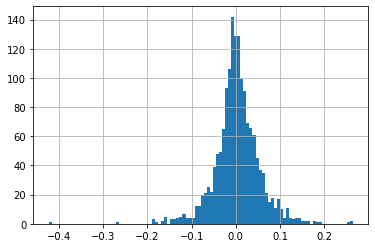

In [29]:
eth["returns"].hist(bins=100)

In [30]:
eth["returns"].describe()

count    1597.000000
mean        0.002767
std         0.051348
min        -0.423472
25%        -0.021233
50%         0.001572
75%         0.028485
max         0.264581
Name: returns, dtype: float64

<AxesSubplot:>

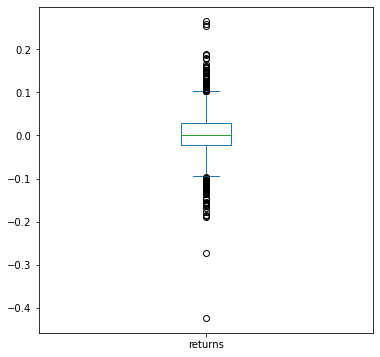

In [31]:
eth["returns"].plot(kind = "box", figsize = (6,6))

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters

C:\Users\jimen\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\jimen\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



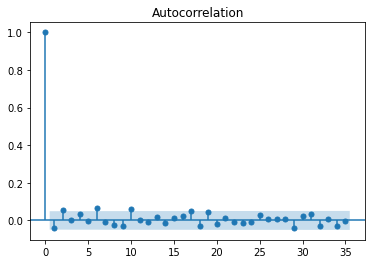

In [33]:
acf_plot = plot_acf(eth.returns.dropna(), lags=35)

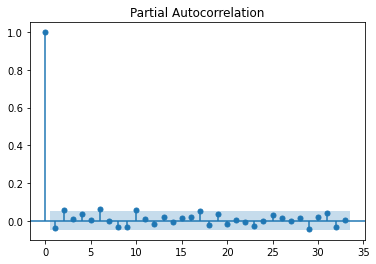

In [34]:
pacf_plot = plot_pacf(eth.returns.dropna())

In [35]:
eth.describe() 

Open         High          Low        Close    Adj Close  \
count  1598.000000  1598.000000  1598.000000  1598.000000  1598.000000   
mean   1026.060794  1061.282123   986.461636  1027.554834  1027.554834   
std    1230.979724  1270.582395  1185.384747  1231.398723  1231.398723   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     196.428421   201.416004   188.846440   196.605812   196.605812   
50%     386.373398   396.498703   375.446228   386.445556   386.445556   
75%    1647.892822  1721.577515  1568.554352  1659.367554  1659.367554   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume    Market Cap          vol  Cumulative Return      returns  
count  1.598000e+03  1.598000e+03  1597.000000        1597.000000  1597.000000  
mean   1.245347e+10  2.042443e+13     1.002767           3.203642     0.002767  
std    1.121937e+10  3.504728e+13     0.051348           3.838326     0.051348  
min    6.217330e+08  1.260973e+11     0.576528           0.262738    -0.423472  
25%    3.154440e+09  1.057692e+12     0.978767           0.612575    -0.021233  
50%    9.525409e+09  2.437624e+12     1.001572           1.204380     0.001572  
75%    1.764118e+10  3.513137e+13     1.028485           5.176043     0.028485  
max    8.448291e+10  3.001804e+14     1.264581          14.996346     0.264581

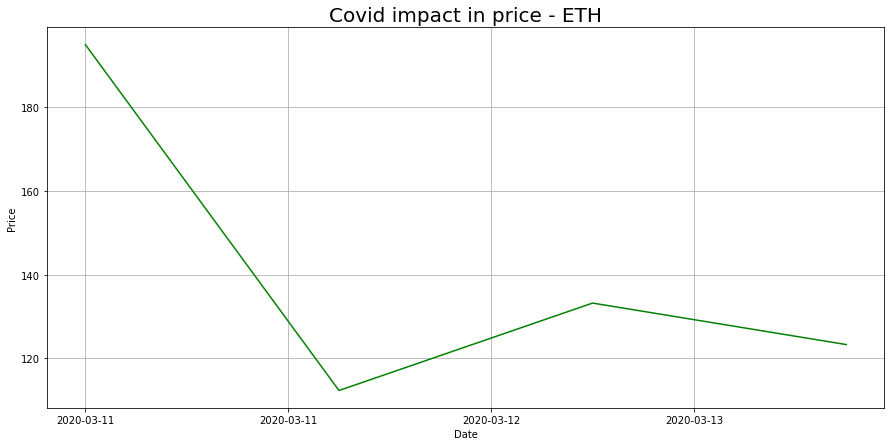

In [36]:
#Para ver el impacto de la crisis del Covid, partimos el dataset para analizar esas fechas en detalle:
#El 13 de marzo de 2020 se decreta el lockdown en la mayoria de paises del mundo. Para ver su impacto, observamos la evolucion del precio desde el 10 al 15 de marzo de 2020

covid = eth[(eth['Date'] > '2020-03-10') & ( eth['Date'] <'2020-03-15')]
covid = covid.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
covid['Date'] = pd.to_datetime(covid['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(covid['Date'], covid['Close'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.title('Covid impact in price - ETH', fontsize='20')
plt.show()

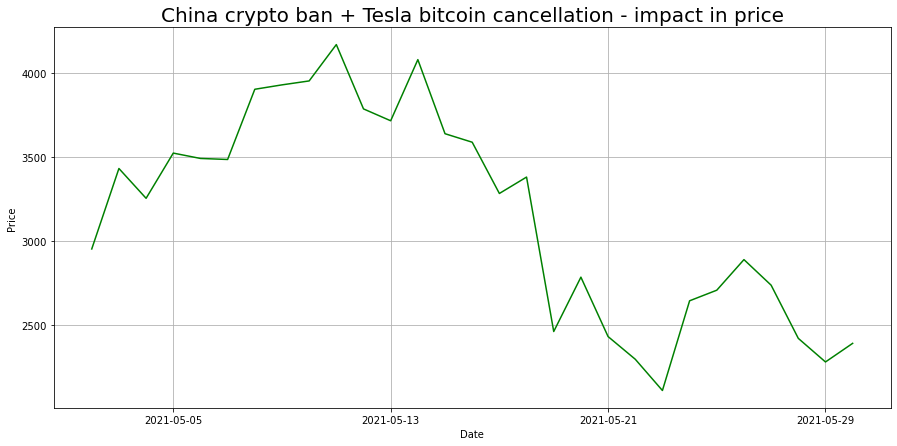

In [37]:
#En mayo de 2021, el Gobierno Chino anunció que declararia como ilegales todas las transacciones con criptomonedas. Ademas, el 13 de mayo de mismo año, Tesla anuncia que dejara de ser posible pagar en BTC por razones climaticas 
#observamos el impacto de este factor externo en el valor de ethereum
china = eth[(eth['Date'] > '2021-05-01') & ( eth['Date'] <'2021-05-31')]
china = china.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
china['Date'] = pd.to_datetime(china['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(china['Date'], china['Close'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.title('China crypto ban + Tesla bitcoin cancellation - impact in price', fontsize='20')
plt.show()

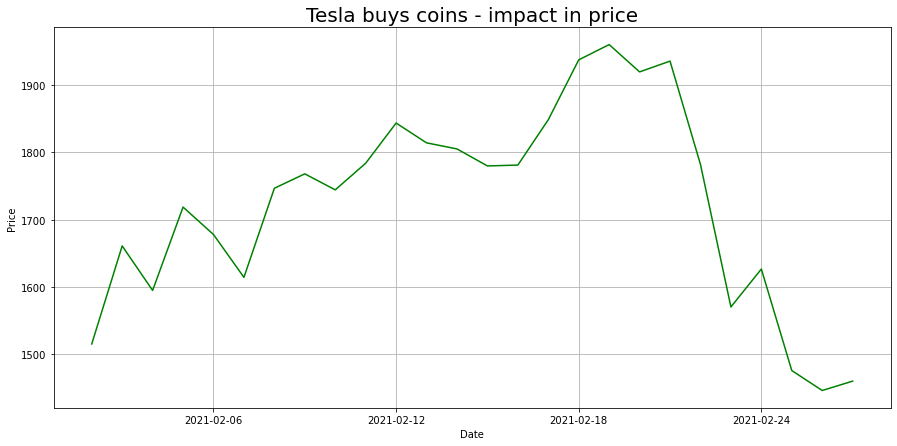

In [38]:
#En febrero de 2021, Elon Musk anuncia que Tesla habia comprado criptomonedas
#observamos el impacto de este factor externo en el valor de cardano
elon = eth[(eth['Date'] > '2021-02-01') & ( eth['Date'] <'2021-02-28')]
elon = elon.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
elon['Date'] = pd.to_datetime(elon['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(elon['Date'], elon['Close'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.title('Tesla buys coins - impact in price', fontsize='20')
plt.show()

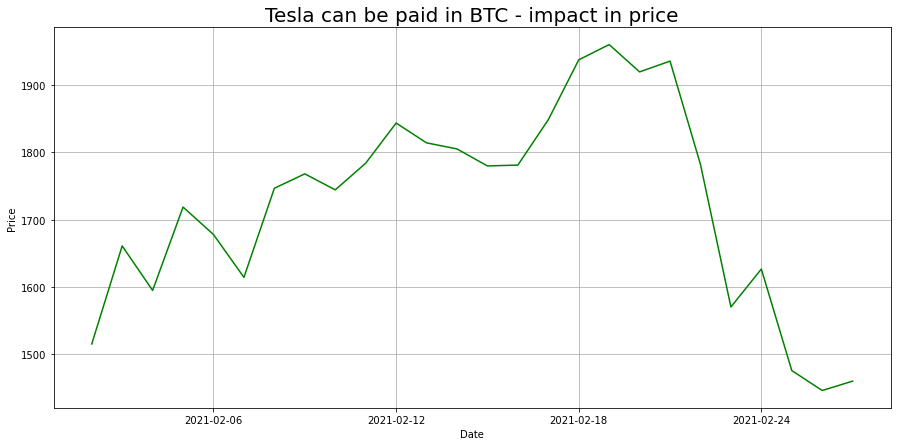

In [39]:
#En junio de 2021, Elon Musk anuncia que se puede pagar Tesla con Bitcoin
#observamos el impacto de este factor externo en el valor de ethereum
elon2 = eth[(eth['Date'] > '2021-02-01') & ( eth['Date'] <'2021-02-28')]
elon2 = elon2.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
elon2['Date'] = pd.to_datetime(elon2['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(elon2['Date'], elon2['Close'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.title('Tesla can be paid in BTC - impact in price', fontsize='20')
plt.show()

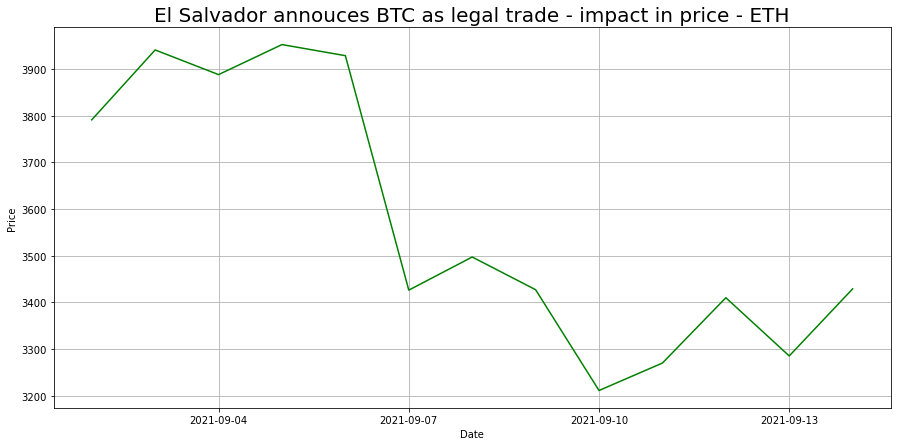

In [40]:
#En septiembre de 2021, El Salvador anuncia que convierte el Bitcoin en moneda de cambio oficial y compra BTC
#observamos el impacto de este factor externo en el valor de cardano
salvador = eth[(eth['Date'] > '2021-09-01') & ( eth['Date'] <'2021-09-15')]
salvador = salvador.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
salvador['Date'] = pd.to_datetime(salvador['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(salvador['Date'], salvador['Close'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.title('El Salvador annouces BTC as legal trade - impact in price - ETH', fontsize='20')
plt.show()

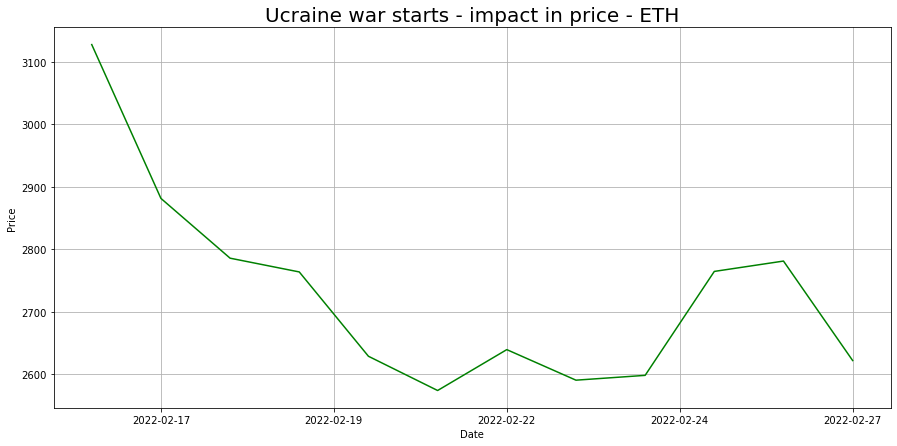

In [41]:
#En febero de 2022, estalla la guerra de Ucrania
#observamos el impacto de este factor externo en el valor de eth
ucrania = eth[(eth['Date'] > '2022-02-15') & ( eth['Date'] <'2022-02-28')]
ucrania = ucrania.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
ucrania['Date'] = pd.to_datetime(ucrania['Date'], format='%Y-%m')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(ucrania['Date'], ucrania['Close'], color='green')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid()
plt.title('Ucraine war starts - impact in price - ETH', fontsize='20')
plt.show()

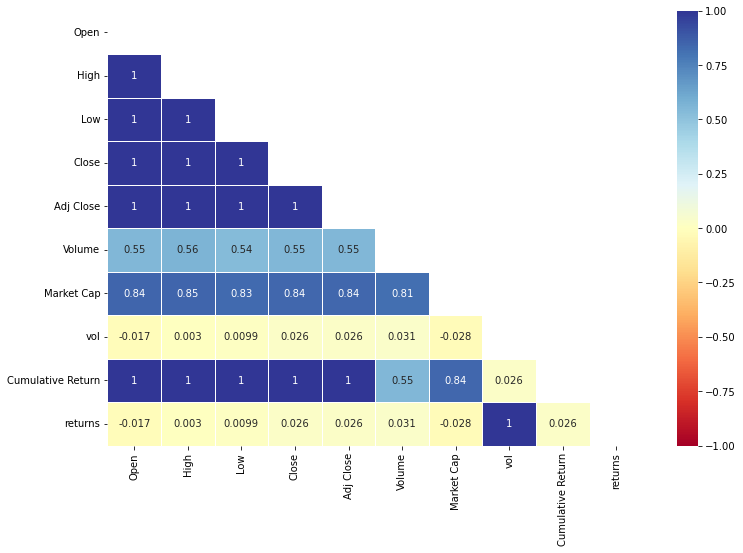

In [42]:
#Matrix de coeficientes de correlación
corr=eth.corr()# corr es una matriz diagonalmente simétrica 
mask = np.triu(np.ones_like(corr))# m# mask es una matriz True/False simétrica sobre la diagonal principal
plt.figure(figsize=(12,8))# # Asignar mask para trazar la mitad del gráfico
sns.heatmap(data=corr,mask=mask,cmap='RdYlBu',vmax=1,vmin=-1,annot=True,linecolor='white',linewidths=0.5)
plt.savefig('ma_tran_tuong_quan.png')

In [43]:
#Regresion lineal
from datetime import datetime
l_rev_date_reg = linear_model.LinearRegression()
eth_log_reg = eth[eth['Open'] > 0]
eth_log_reg['Date'] = eth_log_reg['Date'].map(datetime.toordinal)
X = np.array(eth_log_reg['Date']).reshape(-1,1)
y = np.log(eth_log_reg['Open'])
l_rev_date_reg.fit(X, y)

LinearRegression()

In [44]:
print('Coefficient: {:e}'.format(l_rev_date_reg.coef_[0]))
print('Intercept: {:e}'.format(l_rev_date_reg.intercept_))
print('R^2: {:.4f}'.format(l_rev_date_reg.score(X,y)))

Coefficient: 1.550222e-03
Intercept: -1.136948e+03
R^2: 0.3836


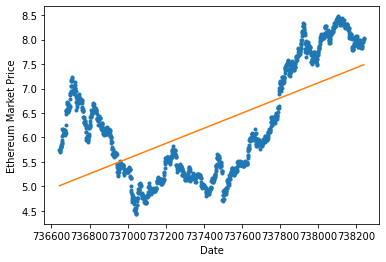

In [45]:
plt.plot(eth_log_reg['Date'],np.log(eth_log_reg['Open']),'.')
plt.plot(eth_log_reg['Date'],l_rev_date_reg.predict(X), '-')
plt.xlabel('Date')
plt.ylabel('Ethereum Market Price')
plt.show()

In [46]:
#Regresion logaritmica

from scipy.optimize import curve_fit

def funct(x,p1,p2):
    return p1*np.log(x)+p2

In [47]:
xdata = np.array([x+1 for x in range(len(eth))])
ydata = np.log(eth['Close'])

In [48]:
popt, pcov = curve_fit(funct, xdata, ydata,p0=(3.0,-10))

fittedydata = funct(xdata,popt[0],popt[1])

In [49]:
print(popt, pcov)

[0.34464303 4.05133802] [[ 0.00077996 -0.00497568]
 [-0.00497568  0.03250538]]


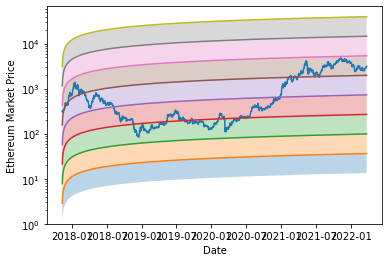

In [89]:
plt.semilogy(eth['Date'],eth['Close'])
for i in range(-3,5):
    plt.plot(eth['Date'],np.exp(fittedydata+i))
    plt.fill_between(eth['Date'],np.exp(fittedydata+i-1),np.exp(fittedydata+i),alpha=0.3)
plt.ylim(bottom=1)
plt.MaxNLocator(3)
plt.xlabel('Date')
plt.ylabel('Ethereum Market Price')
#plt.locator_params(nbins=3, axis='x')
plt.show()

In [ ]:
#LSTM

In [68]:
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [69]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(eth['Close'].values.reshape(-1,1))

In [70]:
prediction_days = 60

In [71]:
x_train,y_train=[],[]

for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [72]:
#Create Neural Network
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [73]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
49/49 [==============================] - 4s 81ms/step - loss: 0.0178
Epoch 2/25
49/49 [==============================] - 4s 85ms/step - loss: 0.0035
Epoch 3/25
49/49 [==============================] - 5s 94ms/step - loss: 0.0036
Epoch 4/25
49/49 [==============================] - 4s 91ms/step - loss: 0.0032
Epoch 5/25
49/49 [==============================] - 4s 84ms/step - loss: 0.0026
Epoch 6/25
49/49 [==============================] - 4s 89ms/step - loss: 0.0027
Epoch 7/25
49/49 [==============================] - 4s 87ms/step - loss: 0.0027
Epoch 8/25
49/49 [==============================] - 4s 92ms/step - loss: 0.0031
Epoch 9/25
49/49 [==============================] - 5s 97ms/step - loss: 0.0026
Epoch 10/25
49/49 [==============================] - 5s 92ms/step - loss: 0.0023
Epoch 11/25
49/49 [==============================] - 4s 88ms/step - loss: 0.0023
Epoch 12/25
49/49 [==============================] - 4s 87ms/step - loss: 0.0026: 1s 
Epoch 13/25
49/49 [=============

In [74]:
#Test modelo
test_start=dt.datetime(2022,5,1)
test_end = dt.datetime.now()
test_data=eth
actual_prices=test_data['Close'].values

In [75]:
total_dataset=pd.concat((eth['Close'], test_data['Close']), axis=0)

In [76]:
model_imputs=total_dataset [(len(total_dataset)) - (len(test_data)) - prediction_days:].values
model_imputs=model_imputs.reshape(-1,1)
model_imputs=scaler.fit_transform(model_imputs)

In [77]:
x_test= []
for x in  range(prediction_days, len(model_imputs)):
    x_test.append(model_imputs[x-prediction_days:x, 0])
    
x_test=np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [78]:
prediction_prices=model.predict(x_test)
prediction_prices=scaler.inverse_transform(prediction_prices)

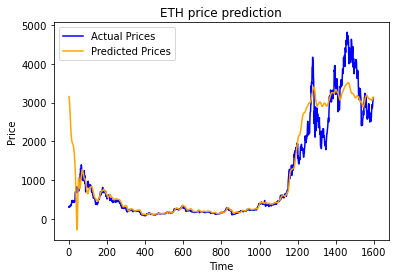

In [101]:
crypto_currency = 'ETH'
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(prediction_prices, color = 'orange', label= 'Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [90]:
#Prediction Next Day
real_data = [model_imputs[len(model_imputs) + 1 - prediction_days:len(model_imputs) +1]]
real_data = np.array(real_data)
real_data = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
prediction=model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

[[3152.9143]
 [3132.6763]
 [3069.2434]
 ...
 [3098.0803]
 [3115.7083]
 [3134.0876]]


In [91]:
#Prediction future
future_day= 38

x_train,y_train=[],[]

for x in range(prediction_days,len(scaled_data)-future_day):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x+future_day,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [92]:
#Create Neural Network
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [93]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
47/47 [==============================] - 4s 87ms/step - loss: 0.0203
Epoch 2/25
47/47 [==============================] - 4s 85ms/step - loss: 0.0105
Epoch 3/25
47/47 [==============================] - 4s 83ms/step - loss: 0.0102
Epoch 4/25
47/47 [==============================] - 4s 83ms/step - loss: 0.0103
Epoch 5/25
47/47 [==============================] - 4s 81ms/step - loss: 0.0104
Epoch 6/25
47/47 [==============================] - 4s 81ms/step - loss: 0.0105
Epoch 7/25
47/47 [==============================] - 4s 82ms/step - loss: 0.0102
Epoch 8/25
47/47 [==============================] - 4s 84ms/step - loss: 0.0098
Epoch 9/25
47/47 [==============================] - 4s 84ms/step - loss: 0.0094
Epoch 10/25
47/47 [==============================] - 4s 87ms/step - loss: 0.0097
Epoch 11/25
47/47 [==============================] - 4s 83ms/step - loss: 0.0093
Epoch 12/25
47/47 [==============================] - 4s 88ms/step - loss: 0.0087
Epoch 13/25
47/47 [==================

In [94]:
#Test modelo
test_start=dt.datetime(2022,5,1)
test_end = dt.datetime.now()
test_data=eth
actual_prices=test_data['Close'].values

In [95]:
total_dataset=pd.concat((eth['Close'], test_data['Close']), axis=0)

In [96]:
model_imputs=total_dataset [(len(total_dataset)) - (len(test_data)) - prediction_days:].values
model_imputs=model_imputs.reshape(-1,1)
model_imputs=scaler.fit_transform(model_imputs)

In [97]:
x_test= []

for x in  range(prediction_days, len(model_imputs)):
    x_test.append(model_imputs[x-prediction_days:x, 0])
    
x_test=np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [98]:
prediction_prices=model.predict(x_test)
prediction_prices=scaler.inverse_transform(prediction_prices)

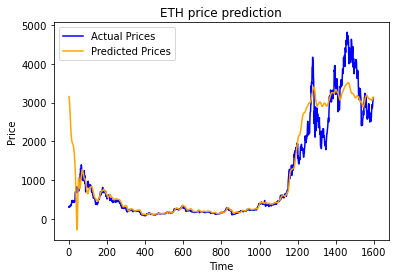

In [102]:
crypto_currency = 'ETH'
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(prediction_prices, color = 'orange', label= 'Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()